In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df_Income_train= pd.read_csv("train.csv")
df_Income_test=pd.read_csv("test.csv")

In [4]:
df_Income_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
df_Income_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
df_Income_train.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [7]:
for column in df_Income_train.columns:
    if column not in df_Income_test.columns:
        print("Output columns is: {}".format(column))

Output columns is: Target


In [8]:
df_Income_train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Q1: Identify the output variable.

In [9]:
df_Income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


### Q2: Understand the type of data.

In [10]:
print('Integer Type: ', list(df_Income_train.select_dtypes(np.int64).columns))
print('Float Type: ', list(df_Income_train.select_dtypes(np.float64).columns))
print('Object Type: ', list(df_Income_train.select_dtypes(np.object).columns))

Integer Type:  ['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1

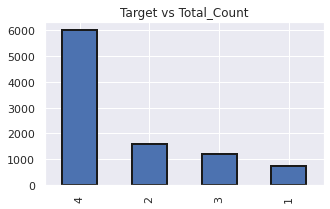

In [11]:
df_Income_train.Target.value_counts().plot.bar(figsize=(5,3), linewidth=2, edgecolor='k', title="Target vs Total_Count");

### Q3: Check if there are any biases in your dataset.

In [12]:
df_Income_train.nunique()

Id                 9557
v2a1                157
hacdor                2
rooms                11
hacapo                2
                   ... 
SQBovercrowding      38
SQBdependency        31
SQBmeaned           155
agesq                97
Target                4
Length: 143, dtype: int64

In [13]:
poverty_variance_within_household = df_Income_train.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))
poverty_variance_within_household[list(poverty_variance_within_household>1)].index

85


Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [14]:
# view data of household with different povert level among head/ members
df_Income_train[df_Income_train['idhogar'] == poverty_variance_within_household[
    list(poverty_variance_within_household>1)].index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


### Q4: Check whether all members of the house have the same poverty level.
### Answer: 85 housesholds out of total 2988 households in dataset have at least one member with income level different than other members of household.

In [15]:
idhogar_missing_head = []
grouped_head_info = df_Income_train.groupby('idhogar')['parentesco1'].sum()

for i in range(len(grouped_head_info)):
    if grouped_head_info[i] == 0:
        idhogar_missing_head.append(grouped_head_info.index[i])  
        
print(len(idhogar_missing_head))
# idhogar_missing_head

15


### Q5: Check if there is a house without a family head.
### Answer: 15 housesholds out of total 2988 households in dataset have no information about family head.

In [16]:
# As found in previous section, 15 housesholds out of total 2988 households in dataset have no information about family head.
for value in idhogar_missing_head:
    k = df_Income_train[df_Income_train['idhogar']==value]['Target'].values
    if np.var(k) !=0:
        print('Members in household {} have different level of poverty'.format(value))

#### 6(i) Members in each of these 15 households have same level of poverty. Now lets check data of households with family head.

In [17]:
for value in list(poverty_variance_within_household[list(poverty_variance_within_household>1)].index):
    # find the poverty level of family head for each household
    head_poverty = int(df_Income_train[(df_Income_train['idhogar']==value) & (df_Income_train['parentesco1']==1)]['Target'].values)
        
    # assign the correct level to each member of household
    df_Income_train.loc[df_Income_train['idhogar'] == value, 'Target'] = head_poverty
    
poverty_variance_within_household = df_Income_train.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))



0


#### 6(ii) Now there is no household with head/ members having different poverty level.

### Q6: Set poverty level of the members and the head of the house {same} within a family.
#### Answer: Done and verified in sr. no. 6(i) and 6(ii) as above.

In [18]:
df_Income_train.isnull().sum()[df_Income_train.isnull().sum()>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [19]:
df_Income_train.isnull().sum().sum()

22140

In [20]:
round(df_Income_train.isnull().sum()[df_Income_train.isnull().sum()>0]/len(df_Income_train)*100,2)

v2a1         71.78
v18q1        76.82
rez_esc      82.95
meaneduc      0.05
SQBmeaned     0.05
dtype: float64

### Q7: Count how many null values are existing in columns.
#### Answer: Following 5 columns has null values mentioned
#### Total null values in complete train dataset are: 22140

In [21]:
df_Income_train.Target.isnull().sum()

0

### Q8: Remove null value rows of the target variable.
#### Answer: Target column does not have any null values.

### Data Preprocessing and Feature Engineering before model building:

In [22]:
sr = df_Income_train.isnull().sum()/len(df_Income_train)*100

In [23]:
sr[sr>0]

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [24]:
# dropping columns having more dan 30% missing values
data1 = df_Income_train.drop(list(sr[sr>30].index),axis=1)

In [25]:
sr1 = data1.isnull().sum()
sr1[sr1>0]

meaneduc     5
SQBmeaned    5
dtype: int64

In [26]:
data1 = data1.dropna()
data1

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [27]:
data1.describe(include = 'all')

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,...,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000
unique,9552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_228d40b82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.038107,4.956554,0.023660,0.994765,0.957601,0.231889,0.386097,1.559359,1.945456,...,74.215557,1644.457391,19.141122,53.494765,3.845059,3.250135,3.868950,102.588867,1644.457391,3.302869
std,NaN,0.191465,1.467227,0.151995,0.072164,0.201509,0.422060,0.680899,1.036672,1.188918,...,76.787245,1741.396614,18.752826,78.451619,6.948053,4.130355,12.439292,93.516890,1741.396614,1.011752
min,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.3+ MB


In [29]:
data1.select_dtypes('float64')

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,10.00,1.000000,1.000000,0.0000,100.0000
1,12.00,1.000000,1.000000,64.0000,144.0000
2,11.00,0.500000,0.250000,64.0000,121.0000
3,11.00,1.333333,1.777778,1.0000,121.0000
4,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...
9552,8.25,1.250000,1.562500,0.0625,68.0625
9553,8.25,1.250000,1.562500,0.0625,68.0625
9554,8.25,1.250000,1.562500,0.0625,68.0625
9555,8.25,1.250000,1.562500,0.0625,68.0625


In [30]:
data1.select_dtypes('int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,0,1,46,81,2116,25,81,1,2116,2
9553,0,6,0,1,1,0,0,2,2,1,...,0,1,2,0,4,25,81,1,4,2
9554,0,6,0,1,1,0,0,2,2,1,...,0,1,50,25,2500,25,81,1,2500,2
9555,0,6,0,1,1,0,0,2,2,1,...,0,1,26,121,676,25,81,1,676,2


In [31]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


### Feature Engineering

### checking for correlation between sqareed and normal variables 

In [32]:
sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 
           'SQBmeaned', 'agesq']

In [33]:
sum(data1['SQBage'] == data1['agesq']) == len(data1)

True

In [34]:
sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 
           'SQBmeaned']

In [35]:
nonsqr_var = ['escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding', 'dependency', 'meaneduc']

In [36]:
for i in range(len(sqr_var)):
    print(data1[[sqr_var[i], nonsqr_var[i]]].corr(),"\n")

             SQBescolari  escolari
SQBescolari     1.000000  0.943317
escolari        0.943317  1.000000 

          SQBage       age
SQBage  1.000000  0.958078
age     0.958078  1.000000 

                SQBhogar_total  hogar_total
SQBhogar_total        1.000000     0.950192
hogar_total           0.950192     1.000000 

           SQBedjefe
SQBedjefe        1.0 

              SQBhogar_nin  hogar_nin
SQBhogar_nin      1.000000   0.884172
hogar_nin         0.884172   1.000000 

                 SQBovercrowding  overcrowding
SQBovercrowding         1.000000      0.945136
overcrowding            0.945136      1.000000 

               SQBdependency
SQBdependency            1.0 

           SQBmeaned  meaneduc
SQBmeaned   1.000000  0.948003
meaneduc    0.948003  1.000000 



#### Since these squared variables are highly correlated with their corresponding original variables. lets drop these variables.

In [37]:
data1.drop(sqr_var,axis=1, inplace = True)

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 132 entries, Id to Target
dtypes: float64(2), int64(125), object(5)
memory usage: 9.7+ MB


#### (2) Id Variables:
#### These variables will be kept in the data as we would need them for identification later

In [39]:
id_var = ['Id', 'idhogar', 'Target']

#### (3) Household Variables:

In [40]:
# 2 columns under household categories already dropped since these columns has more more than 30% null values.

hh_var_boo = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 'paredpreb','pisocemento', 'pareddes', 
              'paredmad','paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 
              'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 
              'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 
              'sanitario3', 'sanitario5',   'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 
              'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 
              'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2', 
              'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 
              'lugar5', 'lugar6', 'area1', 'area2']

# hh_var_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'v18q1', 'tamhog',
#                   'tamviv','hhsize','hogar_nin', 'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']
hh_var_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'tamhog',
                  'tamviv','hhsize','hogar_nin', 'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# hh_var_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
hh_var_cont = ['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [41]:
head = data1.loc[data1['parentesco1'] == 1, :]
head = head[id_var + hh_var_boo + hh_var_cont + hh_var_ordered]
head.shape

(2970, 96)

In [42]:
# Create correlation matrix
corr_matrix = head.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

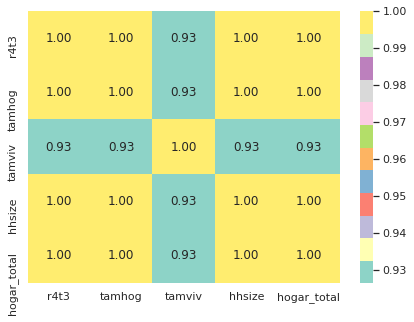

In [43]:
# Lets plot the correlation
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Set3, fmt='.2f');

In [44]:
data1 = data1.drop(to_drop,axis = 1)

### (4) Individual Level Variables
##### There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).

In [45]:

# WE have already dropped column 'rez_esc' from dataset because it had more than 30% null values.

ind_var_boo = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 
               'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2',  'parentesco3', 
               'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 
               'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 
               'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'mobilephone']

# ind_var_ordered = ['rez_esc', 'escolari', 'age']
ind_var_ordered = ['escolari', 'age']

ind = data1[id_var + ind_var_boo + ind_var_ordered]
ind.shape

(9552, 38)

#### Highly Correlaetd Individual Variables
#### We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.

In [46]:

#Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [47]:
# 'Female' is simply the opposite of 'male'. Let's drop one of these two.
data1 = data1.drop('male', axis = 1)

#### Now let us check all 'object' type columns one by one

In [48]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no



#### Id - Not needed, since it is not useful in model building

#### idhogar - Not needed, since house level won't help in predicting anything.

In [49]:
data1 = data1.drop(['Id', 'idhogar'], axis=1)
data1.shape

(9552, 124)

In [50]:
# Custom function to convert object variables into numerical data.

def num_map(i):
    
    if i=='yes':
        return(float(1))
    elif i=='no':
        return(float(0))
    else:
        return(float(i))

In [51]:

data1['dependency']=data1['dependency'].apply(num_map)
data1['edjefe']=data1['edjefe'].apply(num_map)
data1['edjefa']=data1['edjefa'].apply(num_map)

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 124 entries, hacdor to Target
dtypes: float64(5), int64(119)
memory usage: 9.1 MB


In [53]:
X = data1.drop('Target', axis=1)
X

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,agesq
0,0,3,0,1,1,0,0,1,1,0,...,1,1,0,0,0,0,0,1,43,1849
1,0,4,0,1,1,1,0,1,1,0,...,1,1,0,0,0,0,0,1,67,4489
2,0,8,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,92,8464
3,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,17,289
4,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,37,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,3,0,0,0,0,0,1,0,46,2116
9553,0,6,0,1,1,0,0,2,2,1,...,3,0,0,0,0,0,1,0,2,4
9554,0,6,0,1,1,0,0,2,2,1,...,3,0,0,0,0,0,1,0,50,2500
9555,0,6,0,1,1,0,0,2,2,1,...,3,0,0,0,0,0,1,0,26,676


In [54]:
y = data1['Target']
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9552, dtype: int64

### Creating Machine Learning model with Random Forest Classifier:

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
X_train, X_test, y_train,y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7164, 123) (2388, 123) (7164,) (2388,)


In [57]:
RFC =  RandomForestClassifier()

In [58]:
RFC.fit(X_train , y_train)

RandomForestClassifier()

In [59]:
y_predict = RFC.predict(X_test)

In [60]:
RFC.score(X_train, y_train)   # testing accuracy on train data

1.0

In [61]:
RFC.score(X_test, y_test)   # testing accuracy on test data

0.9279731993299832

In [62]:
accuracy_score(y_test,y_predict)

0.9279731993299832

In [63]:
print(confusion_matrix(y_test,y_predict))

[[ 149    0    1   26]
 [   4  338    0   58]
 [   0    5  235   70]
 [   0    8    0 1494]]


In [64]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.97      0.85      0.91       176
           2       0.96      0.84      0.90       400
           3       1.00      0.76      0.86       310
           4       0.91      0.99      0.95      1502

    accuracy                           0.93      2388
   macro avg       0.96      0.86      0.90      2388
weighted avg       0.93      0.93      0.93      2388



#### Improving model performance using GridSearchCV:

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,25,50,100],
    'max_depth': [None,1,5,10],
    'min_samples_leaf': [1,3,5]
}

In [66]:
gs = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3, verbose=1)

In [67]:
gs.fit(X,y)
#gs.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 25, 50, 100]},
             verbose=1)

In [68]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 25}

In [69]:
gs.best_score_

0.6332705192629815

In [70]:
gs_predictions = gs.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test,gs_predictions))

Accuracy Score: 0.6725293132328308


In [72]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
RFC.feature_importances_

array([3.07181456e-03, 2.45906732e-02, 1.47439525e-03, 8.59670293e-04,
       4.06880774e-03, 1.27527100e-02, 1.31498335e-02, 2.01511883e-02,
       1.88195822e-02, 1.60925563e-02, 1.55044643e-02, 2.06991679e-02,
       2.09669190e-02, 2.07927418e-02, 1.90243411e-02, 2.05781105e-02,
       2.08686494e-02, 1.55757659e-02, 5.55230967e-03, 8.61708265e-03,
       8.94782296e-04, 6.45155512e-03, 1.03499715e-03, 9.17282815e-05,
       1.19169560e-04, 1.22444227e-02, 7.88240960e-03, 6.69357233e-06,
       1.44692466e-04, 1.14664881e-03, 4.01421261e-03, 1.83663303e-03,
       1.40017068e-03, 4.79097286e-04, 3.30907189e-06, 1.96595066e-02,
       2.58457679e-03, 2.35268853e-03, 6.07608368e-04, 6.16351333e-03,
       0.00000000e+00, 2.70834620e-04, 4.04986648e-04, 7.04020974e-03,
       7.25794796e-03, 1.89021176e-03, 2.34921289e-04, 2.33676138e-04,
       9.58591009e-03, 9.79791865e-03, 5.68198508e-03, 6.06358996e-03,
       2.23664174e-03, 6.43475435e-03, 2.42175190e-04, 0.00000000e+00,
      

In [74]:
X_train.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'area1', 'age', 'agesq'],
      dtype='object', length=123)

In [75]:
labels = list(X_train)
feature_importances = pd.DataFrame({'feature': labels, 'importance': RFC.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
1,rooms,0.024591
7,r4h2,0.020151
8,r4h3,0.018820
9,r4m1,0.016093
10,r4m2,0.015504


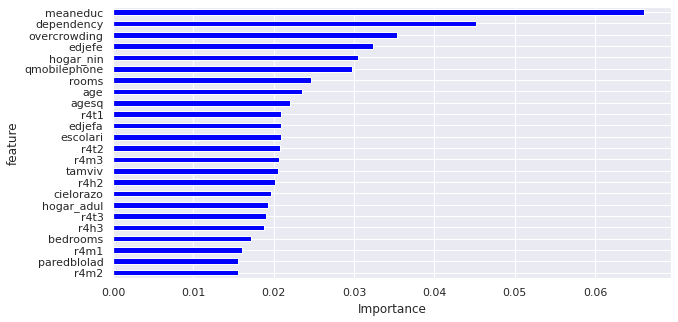

In [76]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(10, 5),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

#### From the above plot we can observe that meaneduc, dependency and overcrowding has significant influence on the model.